### Neural Networks for Images

- Convolutional Layers
- Pooling Layers (Max, Avg, etc.)
- Weight Sharing
- Working with YOLOv8 to detect traffic signs


In [ ]:
!pip install ultralytics

In [2]:
!gdown 1ugN2YPfKMrewHB47RpMYLwY16olGWJfq

Downloading...
From (original): https://drive.google.com/uc?id=1ugN2YPfKMrewHB47RpMYLwY16olGWJfq
From (redirected): https://drive.google.com/uc?id=1ugN2YPfKMrewHB47RpMYLwY16olGWJfq&confirm=t&uuid=21a651d0-4910-401f-be15-f76be1580372
To: /content/ts.zip
100% 261M/261M [00:10<00:00, 24.9MB/s]


In [ ]:
!unzip ts.zip

### Import Required Libraries

---



In [4]:
import os
import random
import yaml
from ultralytics import YOLO

### Split Dataset

In [5]:
dataset_dir = "/content/ts"
train_split = 0.8

image_files = [f for f in os.listdir(dataset_dir) if f.endswith('.jpg')]

random.shuffle(image_files)

num_train = int(len(image_files) * train_split)
num_test = len(image_files) - num_train

train_images = image_files[:num_train]
val_images = image_files[num_train:]

train_dir = "/content/dataset/train"
val_dir = "/content/dataset/val"
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

for img_file in train_images:
    img_path = os.path.join(dataset_dir, img_file)
    txt_file = img_file.replace('.jpg', '.txt')
    txt_path = os.path.join(dataset_dir, txt_file)
    os.rename(img_path, os.path.join(train_dir, img_file))
    os.rename(txt_path, os.path.join(train_dir, txt_file))

for img_file in val_images:
    img_path = os.path.join(dataset_dir, img_file)
    txt_file = img_file.replace('.jpg', '.txt')
    txt_path = os.path.join(dataset_dir, txt_file)
    os.rename(img_path, os.path.join(val_dir, img_file))
    os.rename(txt_path, os.path.join(val_dir, txt_file))

### Definition of YOLO Model

In [6]:
model = YOLO("yolov8s.pt")

100%|██████████| 21.5M/21.5M [00:00<00:00, 226MB/s]


### Train on Custom Dataset

In [7]:
config_content = """path: /content/dataset
train: train
val: val

# Classes
names:
  0: prohibitory
  1: danger
  2: mandatory
  3: other
"""
with open("dataset.yaml", "w") as fw:
  fw.write(config_content)

In [8]:
model.train(data="dataset.yaml", epochs=3)
metrics = model.val()

Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=dataset.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, lin

100%|██████████| 755k/755k [00:00<00:00, 111MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 286MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset/train... 592 images, 0 backgrounds, 0 corrupt: 100%|██████████| 592/592 [00:00<00:00, 1437.53it/s]

train: WARNING ⚠️ /content/dataset/train/00340.jpg: 1 duplicate labels removed


train: New cache created: /content/dataset/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/dataset/val... 149 images, 0 backgrounds, 0 corrupt: 100%|██████████| 149/149 [00:00<00:00, 1596.23it/s]

val: New cache created: /content/dataset/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      4.23G       1.22      4.502     0.9271         35        640: 100%|██████████| 37/37 [00:24<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]

                   all        149        248      0.876      0.611      0.746      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3      4.29G      1.002      1.072     0.8626         59        640: 100%|██████████| 37/37 [00:22<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]

                   all        149        248      0.843       0.81      0.886      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      4.13G     0.9026     0.7766     0.8385         46        640: 100%|██████████| 37/37 [00:25<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.71it/s]

                   all        149        248      0.924       0.85      0.926      0.654



3 epochs completed in 0.027 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.13it/s]


                   all        149        248      0.924      0.843      0.924      0.653
           prohibitory        149         96      0.905      0.892      0.959      0.683
                danger        149         51      0.997      0.922      0.968      0.701
             mandatory        149         45      0.879      0.807      0.888      0.608
                 other        149         56      0.915       0.75      0.882      0.622
Speed: 0.4ms preprocess, 5.4ms inference, 0.0ms loss, 5.8ms postprocess per image
Results saved to runs/detect/train
Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/dataset/val.cache... 149 images, 0 backgrounds, 0 corrupt: 100%|██████████| 149/149 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.92it/s]


                   all        149        248      0.924      0.849      0.926      0.657
           prohibitory        149         96      0.905      0.893      0.959      0.689
                danger        149         51      0.996      0.922      0.968      0.699
             mandatory        149         45       0.88      0.815      0.888      0.612
                 other        149         56      0.915      0.768      0.889       0.63
Speed: 0.4ms preprocess, 8.2ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to runs/detect/train2


In [9]:
results = model("Sign.png")
results[0].save("/content/result.jpg")


image 1/1 /content/Sign.png: 352x640 2 prohibitorys, 198.1ms
Speed: 3.7ms preprocess, 198.1ms inference, 2.2ms postprocess per image at shape (1, 3, 352, 640)


'/content/result.jpg'

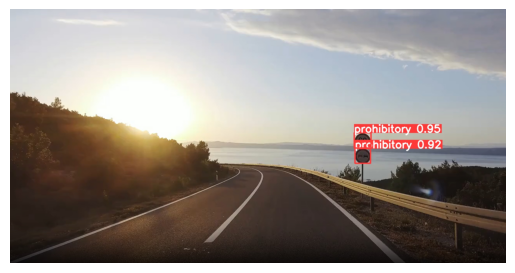

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

result_image_path = "/content/result.jpg"
result_image = mpimg.imread(result_image_path)

plt.imshow(result_image)
plt.axis('off')
plt.show()